In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
locater = r'C:\Users\Kamanda\Desktop\LATITU\Latitude.csv'

In [6]:
data = pd.read_csv(locater)
#print data.head(5)

#Removing zero in PM
data = data[data.PM != 0]
#Removing zero in longitude
data = data[data.Longitude != 0]
#Removing zero in latitude
data = data[data.Latitude != 0]

pm = data['PM']
lons = data['Longitude']
lats = data['Latitude']
date = data['Date']
print date.shape

(708,)


In [7]:
 #Saving PM,Longitude and Latitude in a new csv file 
    
raw_data = {'Date':date,'PM':pm,'Latitude':lats, 'Longitude':lons}
data =pd.DataFrame(raw_data, columns = ['Date','PM','Latitude','Longitude'])

data.to_csv('C:/Users/Kamanda/Desktop/LATITU/DoneLati2.csv')



training shape :
(566, 4)
Test shape: 
(142, 4)


In [40]:
import pylab as pb
pb.ion()
import numpy as np
import GPy


In [6]:
path_to_csv = r'C:/Users/Kamanda/Desktop/LATITU/DoneLati.csv'
data1 = np.genfromtxt(path_to_csv,  delimiter=',', skip_header=1)
#print data1
x = data1[:,0:1]
y = data1[:,[4]]
y1 = data1[:,[4]]
x1=data1[:,[3]]
#print y1

da = pd.read_csv(path_to_csv)
#print da

Optimization restart 1/3, f = -3820.89498916
Optimization restart 2/3, f = -3891.57934077
Optimization restart 3/3, f = 4525.08459224

Name : GP regression
Objective : -3891.57934077
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |              value  |  constraints  |  priors
  rbf.variance             |      312.449932328  |      +ve      |        
  rbf.lengthscale          |      20.1345868806  |      +ve      |        
  Gaussian_noise.variance  |  2.41277523715e-06  |      +ve      |        


 C:\Users\Kamanda\Anaconda2\lib\site-packages\matplotlib\figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


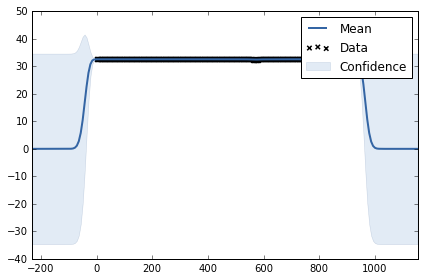

In [8]:
from matplotlib import pyplot as plt
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(x,y,kernel)
m.unconstrain('')
m.optimize()
m.optimize_restarts(num_restarts = 3)
print m
m.plot()


Optimization restart 1/6, f = -3820.89498916
Optimization restart 2/6, f = -3572.82469675
Optimization restart 3/6, f = -3891.57935554
Optimization restart 4/6, f = -3820.89498674
Optimization restart 5/6, f = -3820.895003
Optimization restart 6/6, f = -3820.89498811

Name : GP regression
Objective : -3891.57935554
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |              value  |  constraints  |  priors
  rbf.variance             |      312.382343185  |      +ve      |        
  rbf.lengthscale          |      20.1346362853  |      +ve      |        
  Gaussian_noise.variance  |  2.41285488035e-06  |      +ve      |        


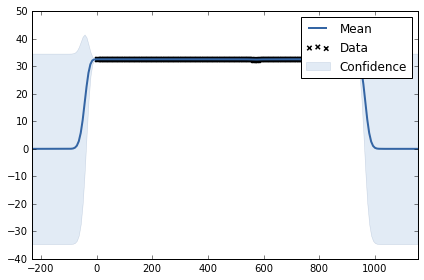

In [9]:
from matplotlib import pyplot as plt

path_to_csv = r'C:/Users/Kamanda/Desktop/LATITU/DoneLati.csv'
data1 = np.genfromtxt(path_to_csv,  delimiter=',', skip_header=1)
#print data1
x = data1[:,0:1]
y = data1[:,[4]]
y1 = data1[:,[4]]
x1=data1[:,[3]]
#print y1

da = pd.read_csv(path_to_csv)
#print da


kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(x,y,kernel)
m.unconstrain('')
m.optimize()
m.optimize_restarts(num_restarts = 6)
print m
m.plot()


Optimization restart 1/6, f = 3998.26289769
Optimization restart 2/6, f = 3998.29372589
Optimization restart 3/6, f = 3998.26255386
Optimization restart 4/6, f = 3998.26255353
Optimization restart 5/6, f = 3998.26326519
Optimization restart 6/6, f = 3998.26255353

Name : GP regression
Objective : 3998.26255353
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |          value  |  constraints  |  priors
  rbf.variance             |  771390.710727  |      +ve      |        
  rbf.lengthscale          |  1075.73091268  |      +ve      |        
  Gaussian_noise.variance  |  325.043203812  |      +ve      |        


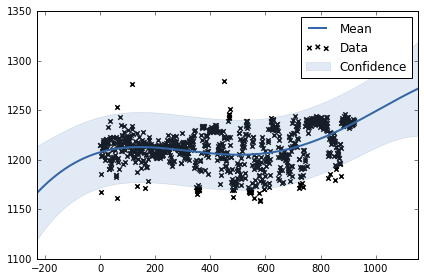

In [141]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(x,y,kernel)
m.unconstrain('')
m.optimize()
m.optimize_restarts(num_restarts = 6)
print m
m.plot()

In [24]:
path_to_csv = r'C:/Users/Kamanda/Desktop/LATITU/DoneLati3.csv'
data1 = np.genfromtxt(path_to_csv,  delimiter=',', skip_header=1)
#print data1
x = data1[:,0:1]
y = data1[:,[4]]
y1 = data1[:,[4]]
x1=data1[:,[3]]


df = pd.read_csv(path_to_csv)
#print df
X11 = df['Date']
y11 = df['PM'] 
lats = df['Latitude']
lon = df['Longitude']



#converting interger in to dates 
date = pd.to_datetime(df['Date'])

#print date
#saving date and PM values
raw_data = {'Date':date, 'PM':df['PM'],'Latitude':df['Latitude'],'Longitude':df['Longitude']}
save =pd.DataFrame(raw_data, columns = ['Date','PM','Latitude','Longitude'])
#save.to_csv('C:/Users/Kamanda/Desktop/LATITU/DoneLatiNEW.csv',index=True)

#reading the saved values
new = r'C:/Users/Kamanda/Desktop/LATITU/DoneLatiNEW.csv'
dates= pd.read_csv(new, parse_dates=['Date'] )
print dates.shape
date = dates['Date']
pm = dates['PM']
#print pm
data = pd.DataFrame({'TIMESTAMP': dates['Date'],
                     'TYPE':dates['PM'] })
#print data.head()
#PRINT Dailly average data
daily = data.set_index('TIMESTAMP').groupby(pd.TimeGrouper(freq='D'))['TYPE'].mean()
monthly = daily.groupby(pd.TimeGrouper(freq='D')).mean()
monthlys = monthly.dropna(axis=0)
print monthlys


(923, 5)
TIMESTAMP
2017-04-16     932.250000
2017-04-18    1210.759028
2017-04-19    1211.039357
2017-04-21    1206.595685
2017-04-24    1213.800040
2017-04-25    1225.456068
Name: TYPE, dtype: float64


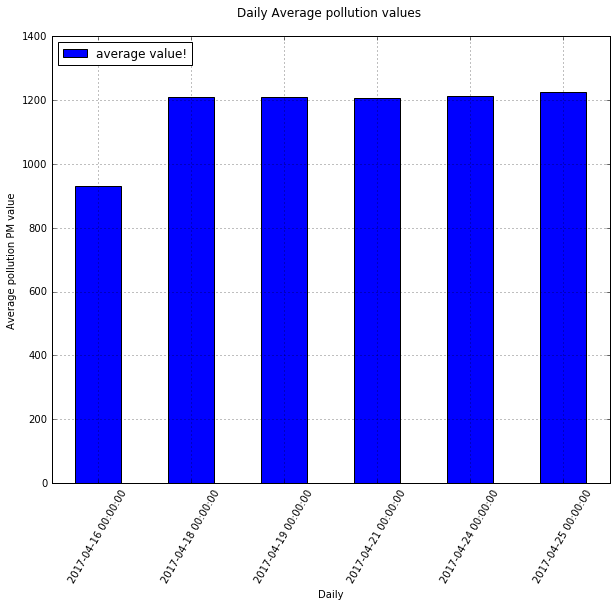

In [11]:

#print monthlys
fig, ax = plt.subplots(figsize=(10,8))
ax = monthlys.plot(kind='bar',label='average value!')
plt.legend(loc=2)
plt.xticks(rotation=60)
plt.grid()
plt.title('Daily Average pollution values \n')
plt.xlabel('Daily')
plt.ylabel('Average pollution PM value')
plt.show()

In [25]:

#Saving the daily average values
raw_data = {'Average':monthlys}
save =pd.DataFrame(raw_data, columns = ['Average'])
#save.to_csv('C:/Users/Kamanda/Desktop/LATITU/DoneLatiMEAN.csv')
#leading the average values
mea =r'C:/Users/Kamanda/Desktop/LATITU/DoneLatiMEAN.csv'
mean = pd.read_csv(mea)
print mean
ya =  mean['Average']
xa = mean['Id']
print xa

   Id  TIMESTAMP      Average
0   0  4/16/2017   932.250000
1   1  4/18/2017  1210.759028
2   2  4/19/2017  1211.039357
3   3  4/21/2017  1206.595685
4   4  4/24/2017  1213.800040
5   5  4/25/2017  1225.456068
0    0
1    1
2    2
3    3
4    4
5    5
Name: Id, dtype: int64


In [13]:

data2 = np.genfromtxt(mea,  delimiter=',', skip_header=1)

xm = data2[:,[0]]
ym=data2[:,[2]]
#dm = data2[:,[1]]
#print data2
print xm
print ym


[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]]
[[  932.25    ]
 [ 1210.759028]
 [ 1211.039357]
 [ 1206.595685]
 [ 1213.80004 ]
 [ 1225.456068]]



Name : GP regression
Objective : 1291629.75242
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


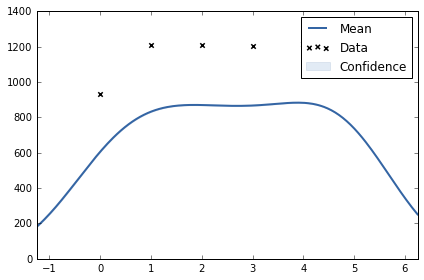

In [103]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(xm,ym,kernel)
print m
m.plot()

Optimization restart 1/5, f = 40.4319999973
Optimization restart 2/5, f = 40.9121725562
Optimization restart 3/5, f = 40.2627384877
Optimization restart 4/5, f = 40.4513218067
Optimization restart 5/5, f = 52.1802881925

Name : GP regression
Objective : 40.2627384877
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |          value  |  constraints  |  priors
  rbf.variance             |  847995.698261  |      +ve      |        
  rbf.lengthscale          |  95359.5536601  |      +ve      |        
  Gaussian_noise.variance  |  12849.2574729  |      +ve      |        


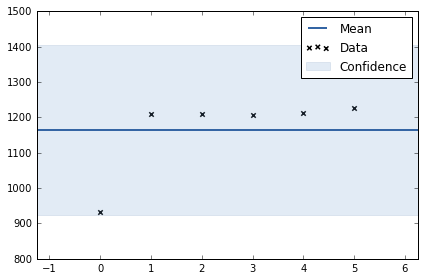

In [99]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(xm,ym,kernel)
m.unconstrain('')
m.optimize()
m.optimize_restarts(num_restarts = 5)
print m
m.plot()


Name : sparse_gp
Objective : 41.5182317602
Number of Parameters : 13
Number of Optimization Parameters : 13
Updates : True
Parameters:
  sparse_gp.               |          value  |  constraints  |  priors
  inducing_inputs          |        (10, 1)  |               |        
  rbf.variance             |  253970.962646  |      +ve      |        
  rbf.lengthscale          |   16957.181985  |      +ve      |        
  Gaussian_noise.variance  |  13560.8127025  |      +ve      |        


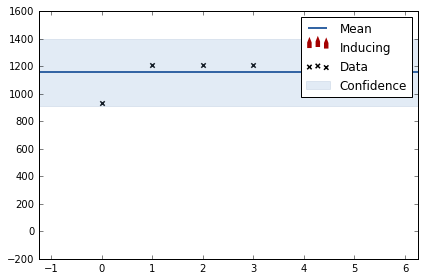

In [97]:
Z = np.hstack((np.linspace(2,5,5),np.linspace(6,10,5)))[:,None]
m = GPy.models.SparseGPRegression(xm,ym,Z=Z)
m.optimize()
m.plot()
print m

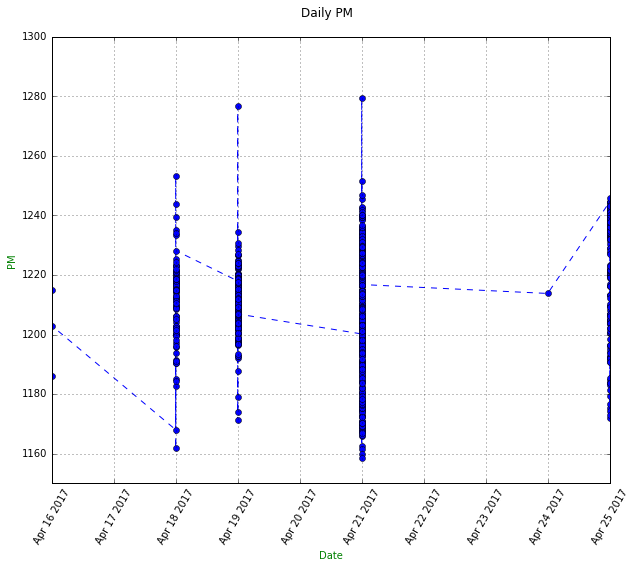

In [98]:
#fig, ax1 = plt.subplots()
fig, ax1 = plt.subplots(figsize=(10,8))
plt.xticks(rotation=60)
plt.legend(loc=2)
ax1.plot(date, pm, 'bo--')
ax1.set_xlabel('Date', color='g')
ax1.set_ylabel('PM', color='g')
plt.ylim((1150,1300))
ax1.set_title("Daily PM  \n")
plt.grid()
plt.grid(which ='minor',alpha = 0.5)
plt.show()



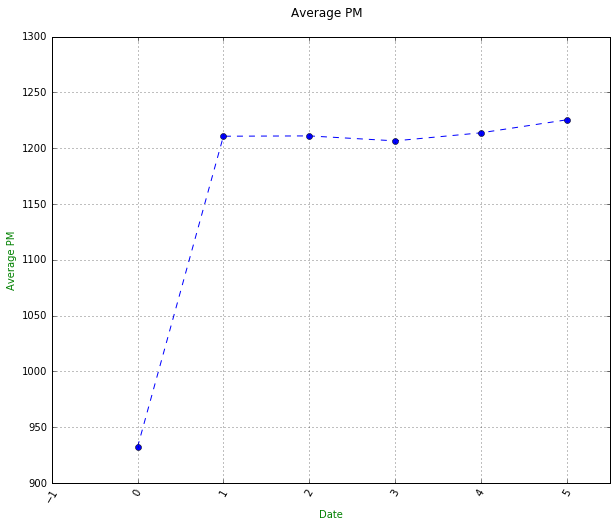

In [89]:
fig, ax1 = plt.subplots(figsize=(10,8))
plt.xticks(rotation=60)
plt.legend(loc=2)
ax1.plot(xm,ym, 'bo--')
ax1.set_xlabel('Date', color='g')
ax1.set_ylabel('Average PM', color='g')
ax1.set_title("Average PM  \n")
plt.ylim((900,1300))
plt.xlim((-1,5.5))
plt.grid()
#plt.grid(which ='major',alpha = 0.5)
plt.grid(which ='minor',alpha = 0.5)
plt.show()


In [72]:

Days =pd.read_csv(mea, parse_dates=['TIMESTAMP'])
pm2 = Days['Average']
ave2 = Days['TIMESTAMP']
print Days
#print pm2
#print ave2

   Id  TIMESTAMP      Average
0   0 2017-04-16   932.250000
1   1 2017-04-18  1210.759028
2   2 2017-04-19  1211.039357
3   3 2017-04-21  1206.595685
4   4 2017-04-24  1213.800040
5   5 2017-04-25  1225.456068


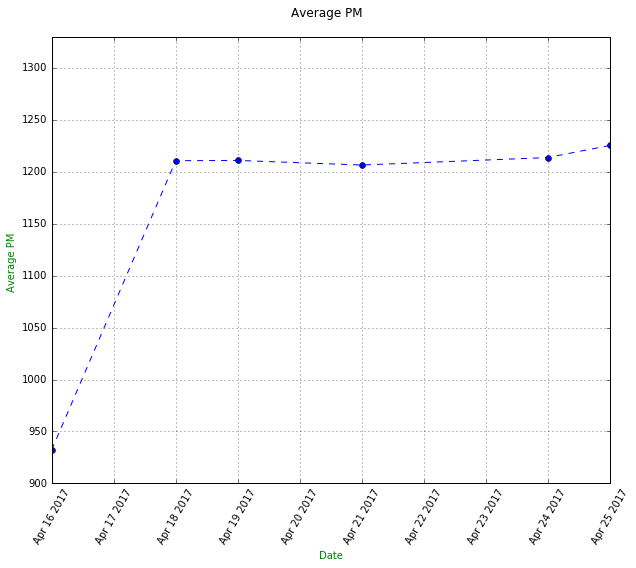

In [115]:
fig, ax1 = plt.subplots(figsize=(10,8))
plt.xticks(rotation=60)
plt.legend(loc=2)
ax1.plot(ave2,pm2 ,'bo--')
ax1.set_xlabel('Date', color='g')
ax1.set_ylabel('Average PM ', color='g')
ax1.set_title("Average PM  \n")
plt.ylim((900,1330))

plt.grid()
plt.grid(which ='minor',alpha = 0.5)
plt.show()

Optimization restart 1/5, f = 40.4319999973
Optimization restart 2/5, f = 52.6277964409
Optimization restart 3/5, f = 40.5832685602
Optimization restart 4/5, f = 41.3201962614
Optimization restart 5/5, f = 41.0408630726

Name : GP regression
Objective : 40.4319999973
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |          value  |  constraints  |  priors
  rbf.variance             |  589667.929758  |      +ve      |        
  rbf.lengthscale          |  22585.8156602  |      +ve      |        
  Gaussian_noise.variance  |  12714.1697197  |      +ve      |        


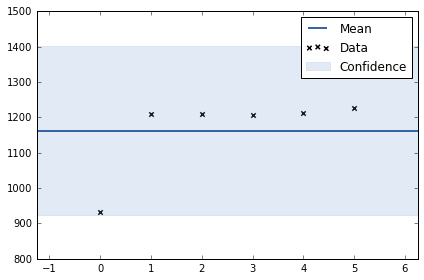

In [109]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(xm,ym,kernel)
m.unconstrain('')
m.optimize()
m.optimize_restarts(num_restarts = 5)
print m
m.plot()

In [127]:
dates1= pd.read_csv(new, parse_dates=['Date'] )
print dates1.head()

   Unnamed: 0       Date      PM  Latitude  Longitude
0           0 2017-04-16  1215.0  0.357639  32.584568
1           1 2017-04-16   125.0  0.357451  32.584465
2           2 2017-04-16  1186.0  0.357558  32.584358
3           3 2017-04-16  1203.0  0.357675  32.584510
4           4 2017-04-18  1168.0  0.357587  32.584365


In [125]:
correl = dates1.corr()["PM"]
print correl 

Unnamed: 0    0.148535
PM            1.000000
Latitude      0.083752
Longitude     0.143347
Name: PM, dtype: float64


In [136]:

columns = dates1.columns.tolist()
# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["Id","Date","PM","Latitude","Longi"]]

# Store the variable we'll be predicting on.
target = "PM"
come = "PM"
print target

PM


In [137]:
train = dates1.sample(frac=0.8, random_state=1)
# Select anything not in the training set and put it in the testing set.
test = dates.loc[~dates1.index.isin(train.index)]
# Print the shapes of both sets.
print 'training shape :'
print (train.shape)
print 'Test shape: '
print (test.shape)

training shape :
(738, 5)
Test shape: 
(185, 5)


In [110]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets, linear_model
from sklearn import model_selection


In [138]:
model = LinearRegression()
# Fit the model to the training data.
model.fit(train[columns], train[target])
print "---Predicting error-------"
# Generate our predictions for the test set.
predictions = model.predict(test[columns])
# Compute error between our test predictions and the actual values.
error =mean_squared_error(predictions, test[target])
print'Mean square error: %s' %(error)
print  "-----RandomForestRegressor------"
# Initialize the model with some parameters.
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
# Fit the model to the data.
model.fit(train[columns], train[target])
# Make predictions.
predictions = model.predict(test[columns])
# Compute the error.
squared = mean_squared_error(predictions, test[target])
print squared 

---Predicting error-------
Mean square error: 300.834642749
-----RandomForestRegressor------
183.337052313


In [163]:
x = train["PM"].T
y = test["PM"].T

#x_ =train["Date"].T
#y_ = test["Date"].T
x_ = train.iloc[:,[0]]
y_ = train.iloc[:,[0]]

#print y.head()
print y_.head()

     Unnamed: 0
769         769
700         700
892         892
385         385
154         154


Optimization restart 1/4, f = -3820.89498916
Optimization restart 2/4, f = -3891.57935637
Optimization restart 3/4, f = -3891.57933803
Optimization restart 4/4, f = -3820.89498464

Name : GP regression
Objective : -3891.57935637
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |              value  |  constraints  |  priors
  rbf.variance             |      312.364372054  |      +ve      |        
  rbf.lengthscale          |      20.1348524314  |      +ve      |        
  Gaussian_noise.variance  |  2.41289795377e-06  |      +ve      |        


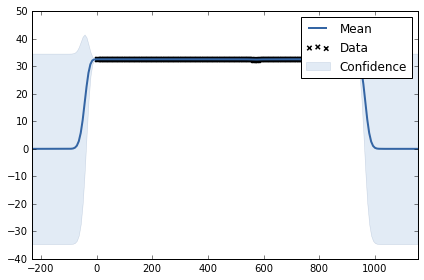

In [18]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(x,y,kernel)
m.unconstrain('')
m.optimize()
m.optimize_restarts(num_restarts = 4)
print m
m.plot()


In [22]:
y2 = data1[:,[2]]
print y2

[[ 1215.      ]
 [  125.      ]
 [ 1186.      ]
 [ 1203.      ]
 [ 1168.      ]
 [ 1205.199951]
 [ 1209.199951]
 [ 1204.300048]
 [ 1212.199951]
 [ 1213.099975]
 [ 1218.099975]
 [ 1220.199951]
 [ 1216.300048]
 [ 1216.900024]
 [ 1214.099975]
 [ 1215.300048]
 [ 1219.699951]
 [ 1202.5     ]
 [ 1199.699951]
 [ 1212.300048]
 [ 1219.199951]
 [ 1220.699951]
 [ 1221.5     ]
 [ 1212.400024]
 [ 1206.099975]
 [ 1215.599975]
 [ 1217.5     ]
 [ 1217.5     ]
 [ 1206.199951]
 [ 1217.900024]
 [ 1233.300048]
 [ 1200.300048]
 [ 1190.400024]
 [ 1190.400024]
 [ 1221.099975]
 [ 1223.      ]
 [ 1239.400024]
 [ 1193.800048]
 [ 1191.400024]
 [ 1200.099975]
 [ 1195.699951]
 [ 1197.199951]
 [ 1210.      ]
 [ 1201.5     ]
 [ 1200.599975]
 [ 1216.599975]
 [ 1202.800048]
 [ 1211.400024]
 [ 1223.400024]
 [ 1216.5     ]
 [ 1202.900024]
 [ 1218.      ]
 [ 1209.599975]
 [ 1205.199951]
 [ 1221.599975]
 [ 1202.199951]
 [ 1185.099975]
 [ 1182.800048]
 [ 1184.300048]
 [ 1223.099975]
 [ 1253.400024]
 [ 1161.800048]
 [ 1199.

Optimization restart 1/4, f = 4730.92968793
Optimization restart 2/4, f = 4740.34468697
Optimization restart 3/4, f = 4734.21211549
Optimization restart 4/4, f = 4731.03260171

Name : GP regression
Objective : 4730.92968793
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |          value  |  constraints  |  priors
  rbf.variance             |  1463843.80777  |      +ve      |        
  rbf.lengthscale          |  54510.3843072  |      +ve      |        
  Gaussian_noise.variance  |  1628.29357083  |      +ve      |        


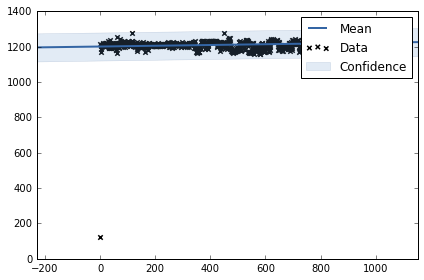

In [23]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(x,y2,kernel)
m.unconstrain('')
m.optimize()
m.optimize_restarts(num_restarts = 4)
print m
m.plot()


In [8]:
print y 

[[ 32.584568]
 [ 32.584465]
 [ 32.584358]
 [ 32.58451 ]
 [ 32.584365]
 [ 32.58448 ]
 [ 32.584518]
 [ 32.584529]
 [ 32.584499]
 [ 32.584495]
 [ 32.584518]
 [ 32.584537]
 [ 32.584533]
 [ 32.584564]
 [ 32.58448 ]
 [ 32.584484]
 [ 32.584545]
 [ 32.584384]
 [ 32.584472]
 [ 32.584461]
 [ 32.584468]
 [ 32.584506]
 [ 32.584537]
 [ 32.584484]
 [ 32.584522]
 [ 32.584552]
 [ 32.584484]
 [ 32.584518]
 [ 32.584465]
 [ 32.584491]
 [ 32.584465]
 [ 32.584522]
 [ 32.584449]
 [ 32.58451 ]
 [ 32.584541]
 [ 32.584465]
 [ 32.584461]
 [ 32.584537]
 [ 32.584587]
 [ 32.584457]
 [ 32.584709]
 [ 32.584537]
 [ 32.584606]
 [ 32.584583]
 [ 32.584522]
 [ 32.584564]
 [ 32.584625]
 [ 32.584701]
 [ 32.584533]
 [ 32.584556]
 [ 32.584484]
 [ 32.584491]
 [ 32.58451 ]
 [ 32.584487]
 [ 32.584541]
 [ 32.584426]
 [ 32.584495]
 [ 32.584552]
 [ 32.584545]
 [ 32.584541]
 [ 32.584671]
 [ 32.584766]
 [ 32.584499]
 [ 32.58443 ]
 [ 32.584518]
 [ 32.584468]
 [ 32.58459 ]
 [ 32.584529]
 [ 32.584506]
 [ 32.584438]
 [ 32.584617]
 [ 32.

In [12]:
train = data.sample(frac=0.8, random_state=1)
# Select anything not in the training set and put it in the testing set.
test = data.loc[~data.index.isin(train.index)]
# Print the shapes of both sets.
print 'training shape :'
print (train.shape)
print 'Test shape: '
print (test.shape)
print data.head()

training shape :
(566, 4)
Test shape: 
(142, 4)
        Date           PM  Latitude  Longitude
0  2017,4,16  1215.099975  0.357639  32.584568
1  2017,4,16  1215.099975  0.357451  32.584465
2  2017,4,16  1186.000000  0.357558  32.584358
3  2017,4,16  1203.699951  0.357675  32.584510
4  2017,4,18  1168.000000  0.357587  32.584365


In [13]:
# Get all the columns from the dataframe.
columns = data.columns.tolist()
# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["Date","PM","Latitude","Longitude"]]


In [14]:
# Store the variable we'll be predicting on.
target = "PM"
#come = "entry_id"
print target

PM


In [15]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets, linear_model
from sklearn import model_selection

C:\Users\Kamanda\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print mean_squared_error(y_true, y_pred)

0.375


In [27]:
from sklearn.metrics import mean_squared_error
ya =  mean['Average']
xa = mean['Id']
print xa
print mean_squared_error(xa,ya)

0    0
1    1
2    2
3    3
4    4
5    5
Name: Id, dtype: int64
1366025.80979


In [77]:
X3 = data.iloc[:,0].T
#print X
Y3 = data.iloc[:,1].T
validation_size = 0.20
seed = 2
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X3, Y3, test_size=validation_size, random_state=seed)


regr = LinearRegression()
regr.fit(np.transpose(np.matrix(X_train)), np.transpose(np.matrix(Y_train)))

print('Coefficients: \n', regr.coef_)
#print regr

('Coefficients: \n', array([[  4.32611821e-14]]))


In [38]:
print X_train.shape
print X_validation.shape
print Y_train.shape
print Y_validation.shape
#print Y_validation

(738,)
(185,)
(738,)
(185,)


In [62]:
cali = r'C:\Users\Kamanda\Google Drive\Air polutions\1\MODELS\CALIBRATION\CalibratedPM1.csv'
#calis = pd.read_csv(cali, parse_dates['DATE _STAMP'])
calis= pd.read_csv(cali, parse_dates=['created_at'])
print calis
date23 = calis['created_at']
calibra = calis['Calibration']
print date23

  created_at  Calibration
0 2017-04-16     197.4043
1 2017-04-18     238.9579
2 2017-04-19     239.0012
3 2017-04-21     239.3145
4 2017-04-24     239.4278
5 2017-04-25     241.2291
0   2017-04-16
1   2017-04-18
2   2017-04-19
3   2017-04-21
4   2017-04-24
5   2017-04-25
Name: created_at, dtype: datetime64[ns]


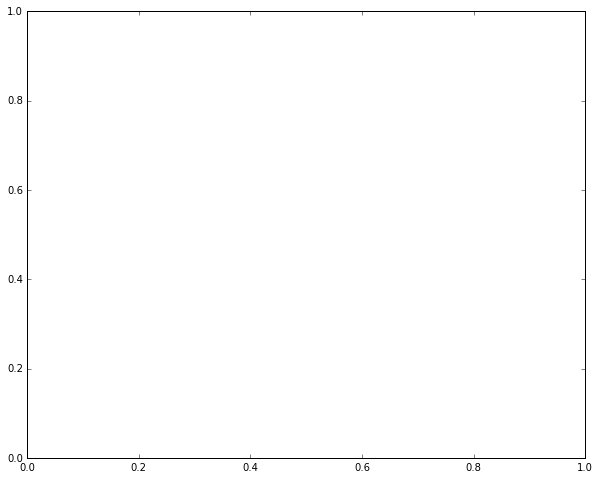

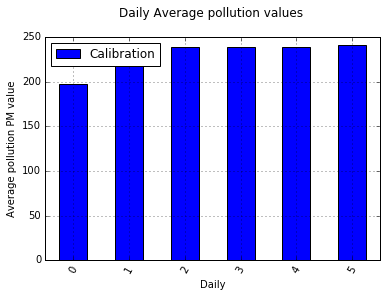

In [72]:
fig, ax = plt.subplots(figsize=(10,8))
ax = calis.plot(kind='bar',label='AQI!')
plt.legend(loc=2)
plt.xticks(rotation=60)
plt.grid()
plt.title('Daily Average pollution values \n')
plt.xlabel('Daily')
plt.ylabel('Average pollution PM value')
plt.show()

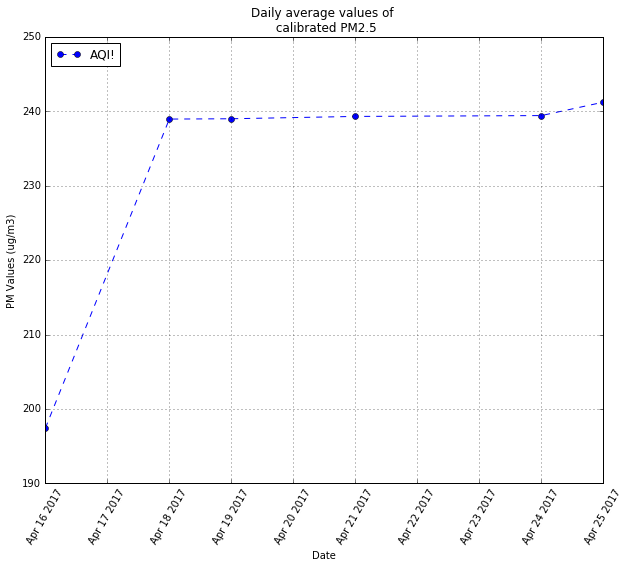

In [75]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(date23,calibra,  'o--',label='AQI!')
plt.legend(loc=2)
plt.grid()
plt.xticks(rotation=60)
plt.title('Daily average values of \n calibrated PM2.5')
plt.xlabel('Date')
plt.ylabel('PM Values (ug/m3)')
plt.show()

In [79]:
caliz = r'C:\Users\Kamanda\Google Drive\Air polutions\1\MODELS\CALIBRATION\CalibratedPM2.csv'
#calis = pd.read_csv(cali, parse_dates['DATE _STAMP'])
 
data123 = np.genfromtxt(caliz,  delimiter=',', skip_header=1)
print data123

[[   1.           nan  197.4043]
 [   2.           nan  238.9579]
 [   3.           nan  239.0012]
 [   4.           nan  239.3145]
 [   5.           nan  239.4278]
 [   6.           nan  241.2291]]


In [81]:
xz = data123[:,0:1]
yz= data123[:,[2]]
print xz

[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]]


Optimization restart 1/3, f = 28.5378676916
Optimization restart 2/3, f = 29.0951273092
Optimization restart 3/3, f = 29.1043479052

Name : GP regression
Objective : 28.5378676916
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |          value  |  constraints  |  priors
  rbf.variance             |  28662.8625057  |      +ve      |        
  rbf.lengthscale          |  8.67207885868  |      +ve      |        
  Gaussian_noise.variance  |  106.000621583  |      +ve      |        


 C:\Users\Kamanda\Anaconda2\lib\site-packages\matplotlib\figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


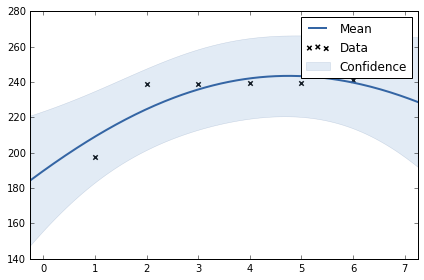

In [82]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(xz,yz,kernel)
m.unconstrain('')
m.optimize()
m.optimize_restarts(num_restarts = 3)
print m
m.plot()


Name : GP regression
Objective : 51241.7394995
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


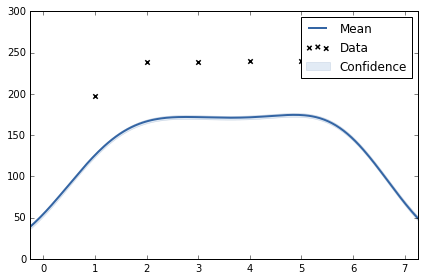

In [84]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(xz,yz,kernel)

print m
m.plot()


Name : sparse_gp
Objective : 40.6552492706
Number of Parameters : 23
Number of Optimization Parameters : 23
Updates : True
Parameters:
  sparse_gp.               |          value  |  constraints  |  priors
  inducing_inputs          |        (20, 1)  |               |        
  rbf.variance             |  1914.85246703  |      +ve      |        
  rbf.lengthscale          |  33.8537376763  |      +ve      |        
  Gaussian_noise.variance  |  271.315224349  |      +ve      |        


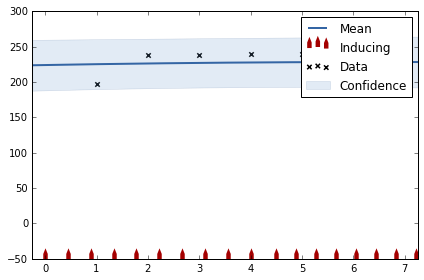

In [96]:
Z = np.hstack((np.linspace(0,4,10),np.linspace(4.5,8,10)))[:,None]
m = GPy.models.SparseGPRegression(xz,yz,Z=Z)
m.optimize()
m.plot()
#print m
print m

In [102]:
from IPython.display import display
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(xz,yz,kernel)
m.optimize(messages=True)
m.optimize_restarts(num_restarts = 10)
display(m)
print m

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


Optimization restart 1/10, f = 28.5378676916
Optimization restart 2/10, f = 29.1225601187
Optimization restart 3/10, f = 29.1033623803
Optimization restart 4/10, f = 28.5378677087
Optimization restart 5/10, f = 28.5378682766
Optimization restart 6/10, f = 29.0931343302
Optimization restart 7/10, f = 28.5378676916
Optimization restart 8/10, f = 29.0951466136
Optimization restart 9/10, f = 28.5378676938
Optimization restart 10/10, f = 29.132068738


GP_regression.,value,constraints,priors
rbf.variance,28662.8625057,+ve,
rbf.lengthscale,8.67207885868,+ve,
Gaussian_noise.variance,106.000621583,+ve,



Name : GP regression
Objective : 28.5378676916
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |          value  |  constraints  |  priors
  rbf.variance             |  28662.8625057  |      +ve      |        
  rbf.lengthscale          |  8.67207885868  |      +ve      |        
  Gaussian_noise.variance  |  106.000621583  |      +ve      |        


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


Optimization restart 1/20, f = 28.5378676916
Optimization restart 2/20, f = 31.4874305129
Optimization restart 3/20, f = 29.0950351195
Optimization restart 4/20, f = 31.5206176274
Optimization restart 5/20, f = 28.5378676916
Optimization restart 6/20, f = 29.0951874572
Optimization restart 7/20, f = 29.1640987479
Optimization restart 8/20, f = 28.5378676976
Optimization restart 9/20, f = 28.5378676916
Optimization restart 10/20, f = 29.0949783909
Optimization restart 11/20, f = 29.0951464045
Optimization restart 12/20, f = 28.914955482
Optimization restart 13/20, f = 28.5378676926
Optimization restart 14/20, f = 28.5378676923
Optimization restart 15/20, f = 28.5378676921
Optimization restart 16/20, f = 28.7421148801
Optimization restart 17/20, f = 32.8921344357
Optimization restart 18/20, f = 28.5378676942
Optimization restart 19/20, f = 29.1263320003
Optimization restart 20/20, f = 28.9924075734

Name : GP regression
Objective : 28.5378676916
Number of Parameters : 3
Number of Optimiz

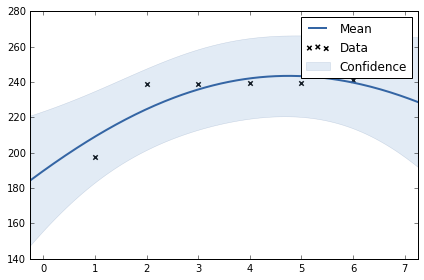

In [104]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(xz,yz,kernel)
m.unconstrain('')
m.optimize(messages=True)
m.optimize_restarts(num_restarts = 20)
print m
m.plot()


Name : sparse_gp
Objective : 40.6540085069
Number of Parameters : 13
Number of Optimization Parameters : 13
Updates : True
Parameters:
  sparse_gp.               |          value  |  constraints  |  priors
  inducing_inputs          |        (10, 1)  |               |        
  rbf.variance             |   1915.3413516  |      +ve      |        
  rbf.lengthscale          |  34.3472543236  |      +ve      |        
  Gaussian_noise.variance  |  271.409578285  |      +ve      |        


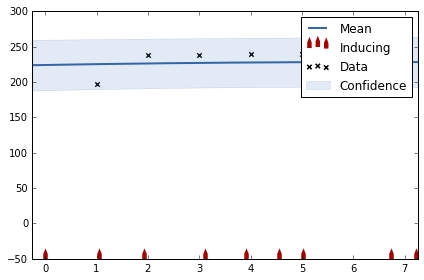

In [105]:
Z = np.hstack((np.linspace(0,4,5),np.linspace(4.5,8,5)))[:,None]
m = GPy.models.SparseGPRegression(xz,yz,Z=Z)
m.optimize()
m.plot()
#print m
print m

In [112]:
columns = calis.columns.tolist()
# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["created_at","Calibration"]]

# Store the variable we'll be predicting on.
target = "Calibration"
come = "Calibration"
print target
print calis
date23 = calis['created_at']
calibra = calis['Calibration']
print date23
train = calis.sample(frac=0.8, random_state=1)
# Select anything not in the training set and put it in the testing set.
test = calis.loc[~calis.index.isin(train.index)]
# Print the shapes of both sets.
print 'training shape :'
print (train.shape)
print 'Test shape: '
print (test.shape)


Calibration
  created_at  Calibration
0 2017-04-16     197.4043
1 2017-04-18     238.9579
2 2017-04-19     239.0012
3 2017-04-21     239.3145
4 2017-04-24     239.4278
5 2017-04-25     241.2291
0   2017-04-16
1   2017-04-18
2   2017-04-19
3   2017-04-21
4   2017-04-24
5   2017-04-25
Name: created_at, dtype: datetime64[ns]
training shape :
(5, 2)
Test shape: 
(1, 2)
